In [11]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas
import math
import numpy as np
import lmfit
import os
from uncertainties import ufloat
import array_to_latex as atl
from uncertainties import unumpy as up

In [12]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

In [13]:
def gaus1fit(von,bis,path,m=1,mmin=0,mmax=2,s=0.2,smax=1000,scale=1e-9,override=False): 
    vonarr = pos(von)
    bisarr = pos(bis)

    model_gaus = lmfit.models.GaussianModel()  
    pars_gaus=model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])
    if override:
        #pars_gaus = model_gaus.make_params()
        pars_gaus["center"].set(value=m,min=mmin,max=mmax)
        pars_gaus["sigma"].set(value=1,min=0)
        pars_gaus["amplitude"].set(value=1,min=0)


    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],weights=1/data[2,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    

    plt.grid()
    plt.legend()
    plt.savefig('Results/'+str(path)+'.pdf')

    out_gaus.plot()


    return np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))]), out_gaus


/home/friedrichjahns/.local/lib/python3.10/site-packages/lmfit/model.py:2159: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kws_)


(26.0, 29.0)

<Figure size 1600x800 with 0 Axes>

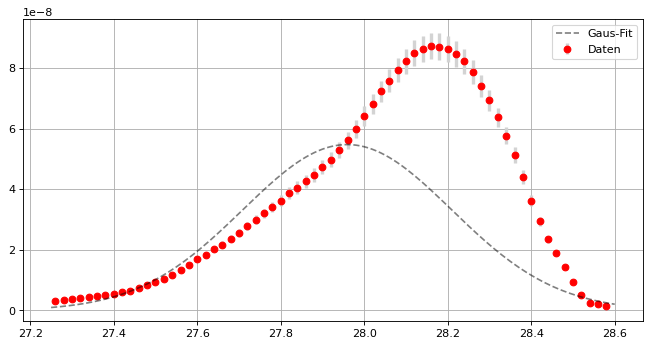

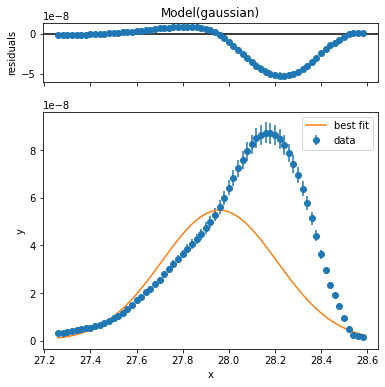

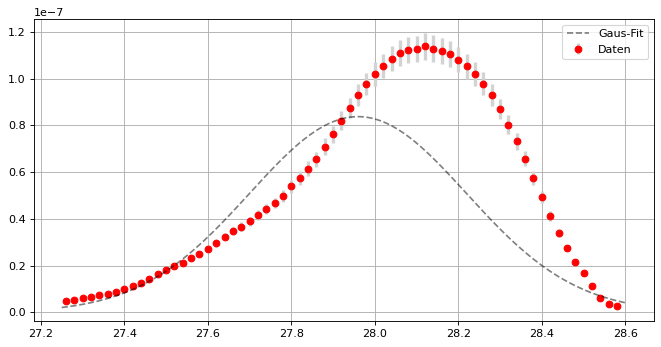

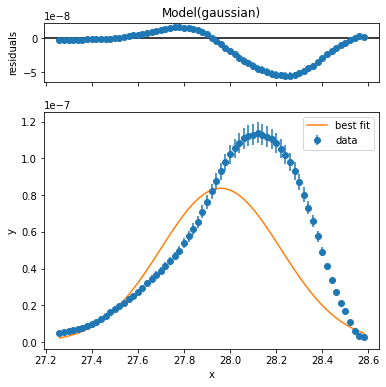

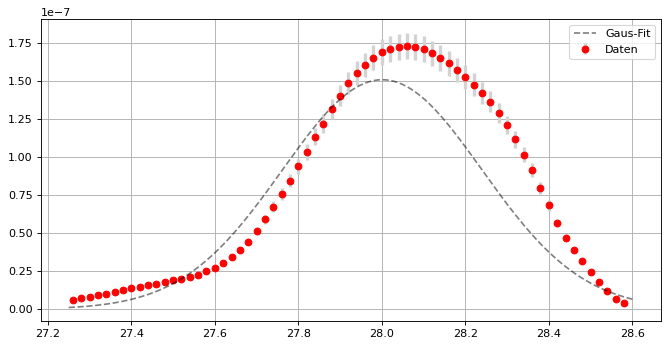

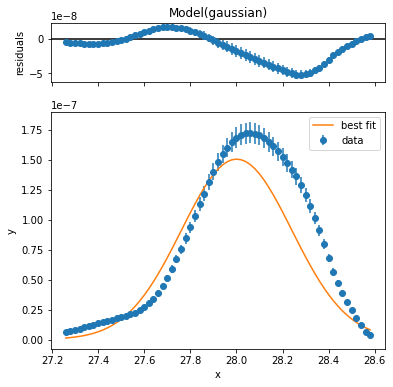

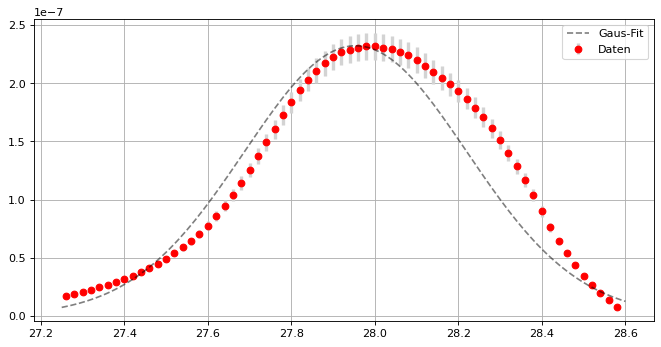

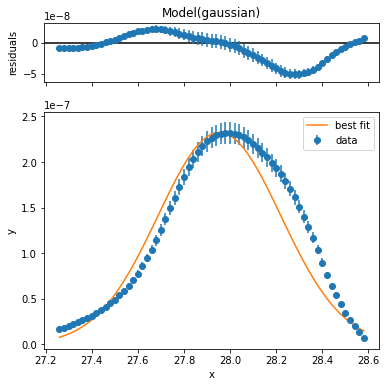

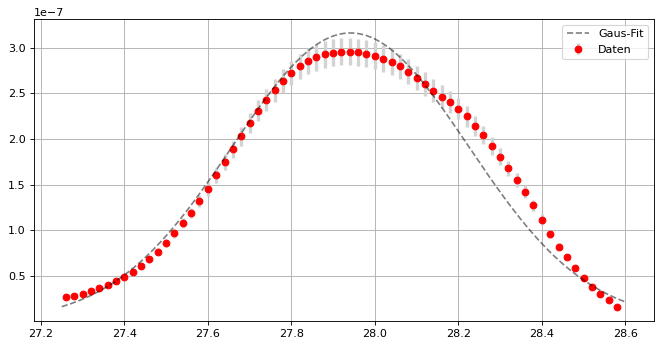

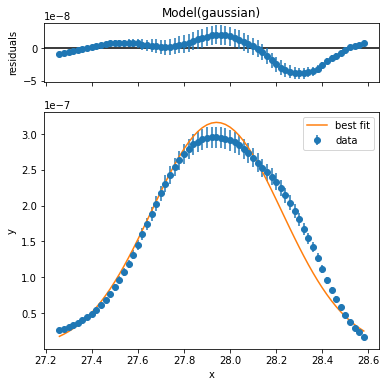

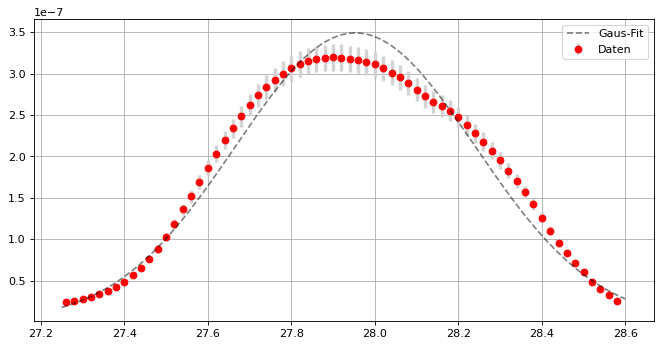

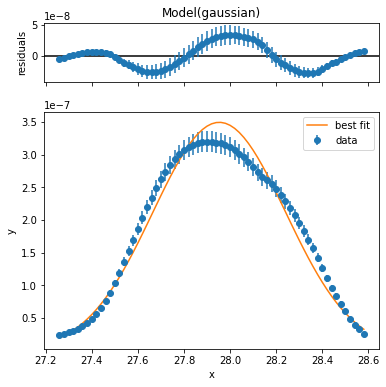

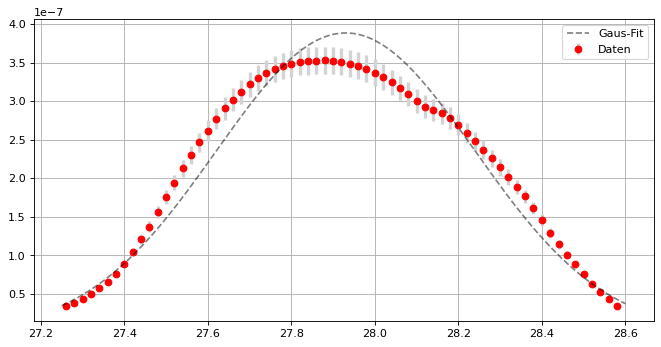

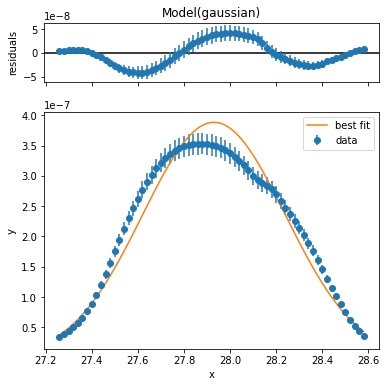

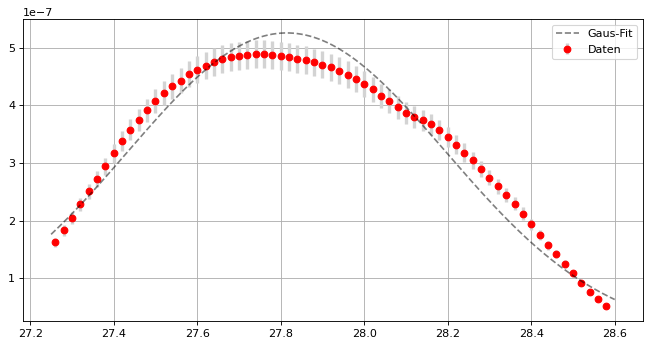

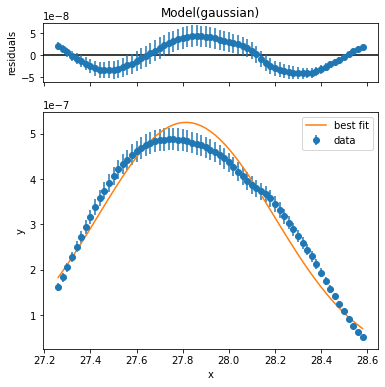

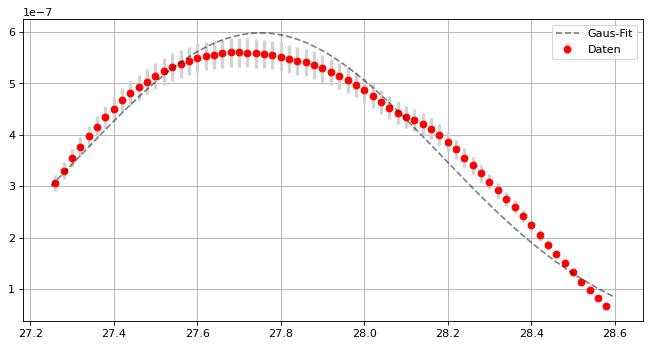

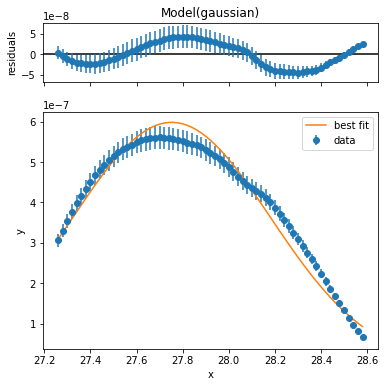

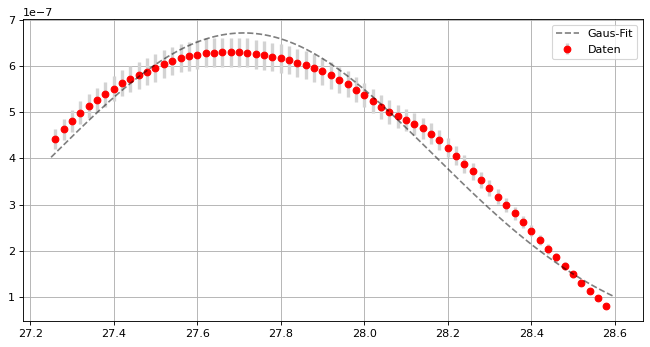

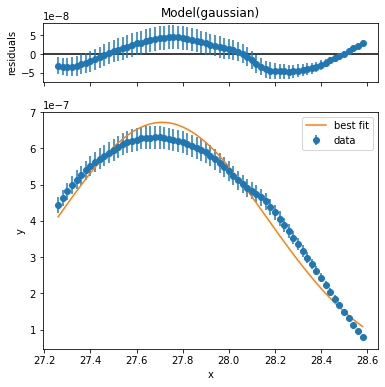

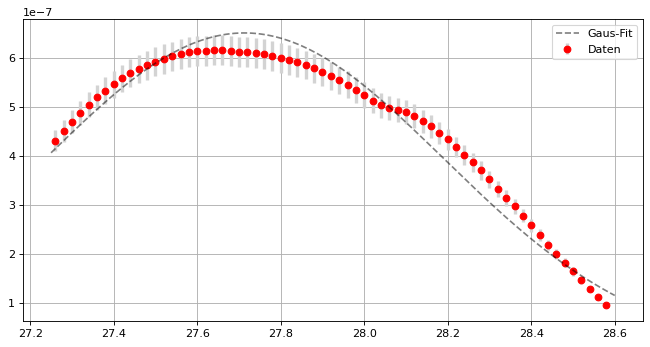

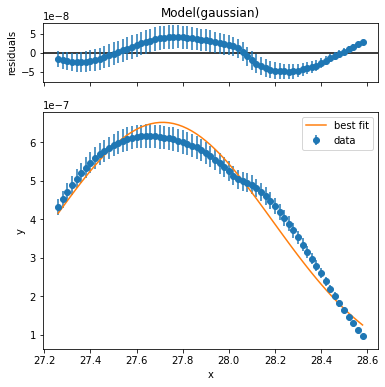

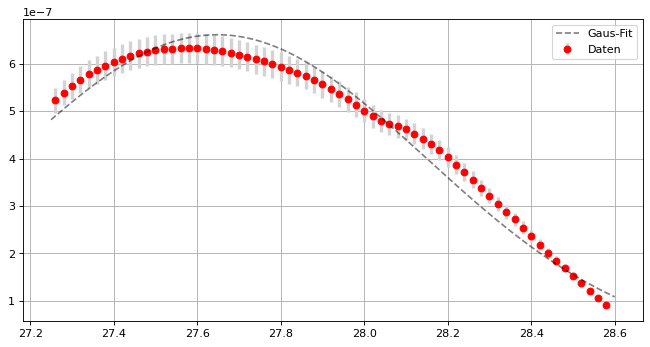

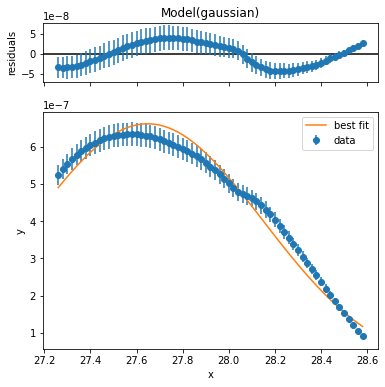

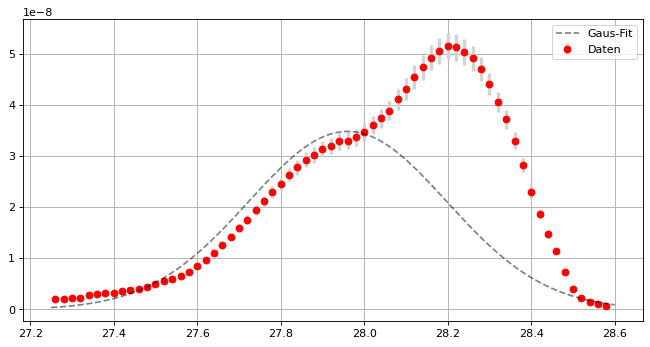

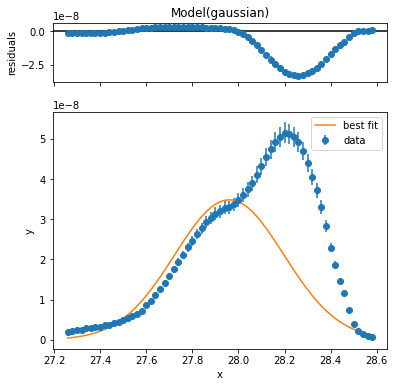

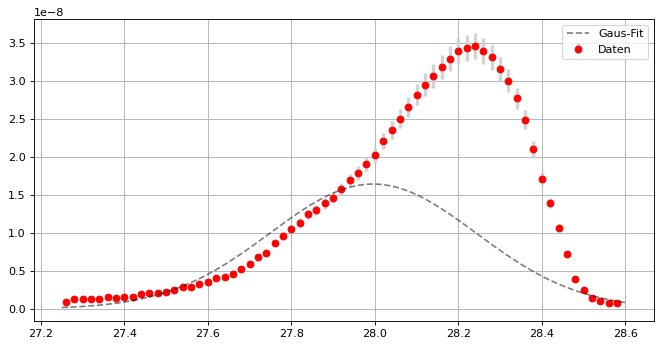

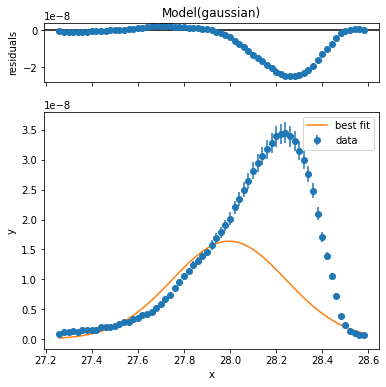

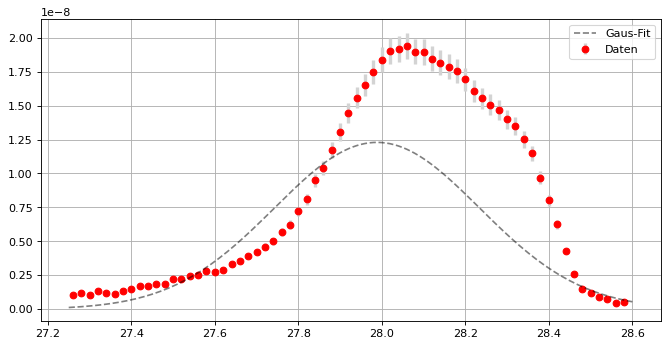

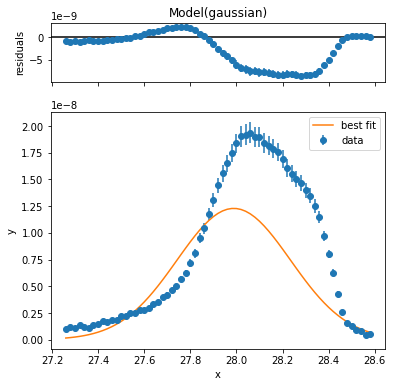

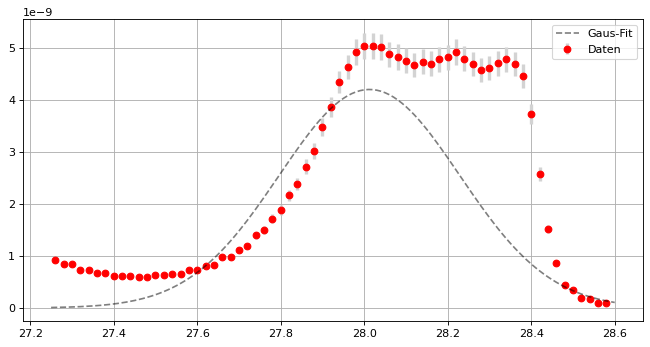

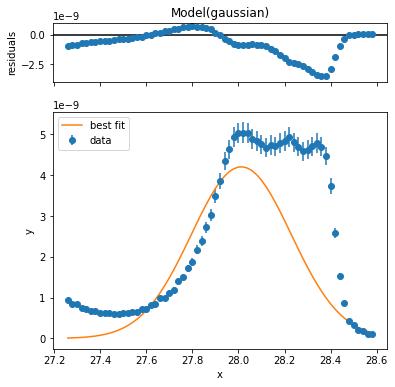

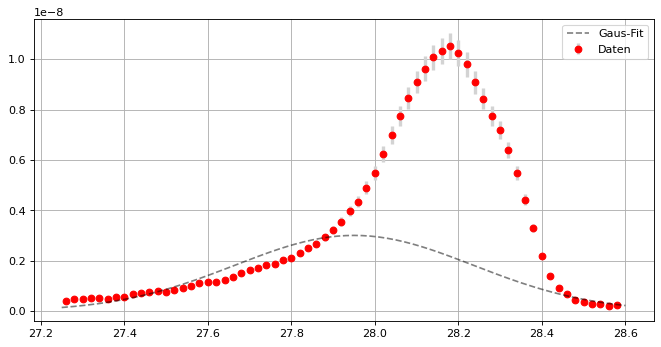

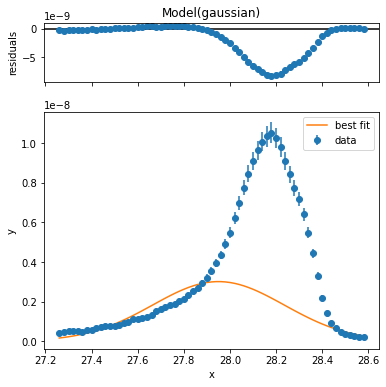

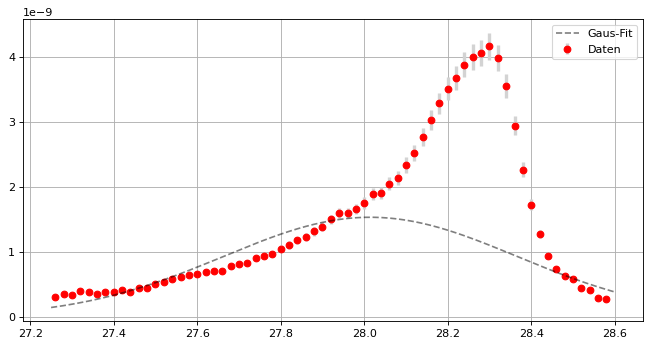

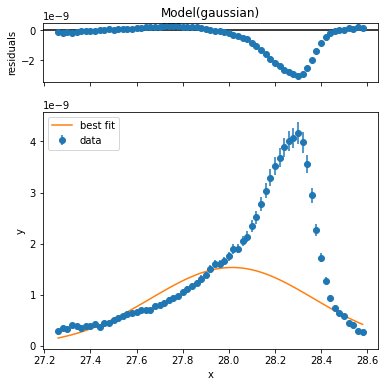

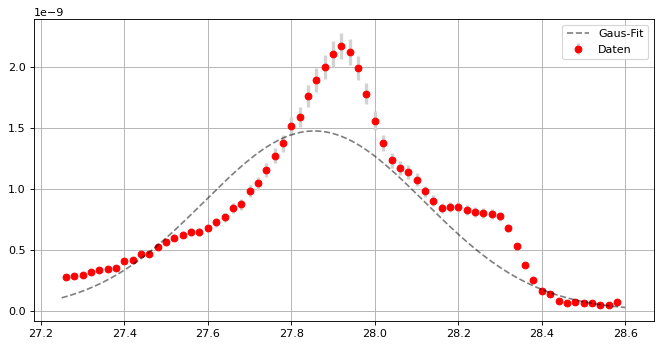

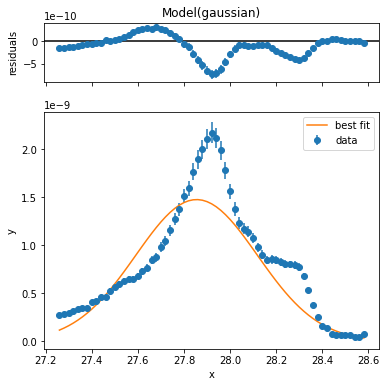

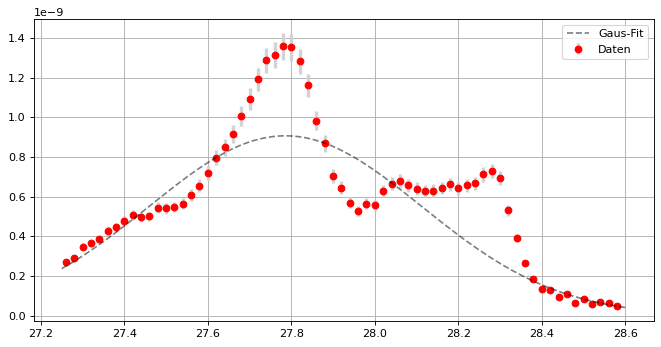

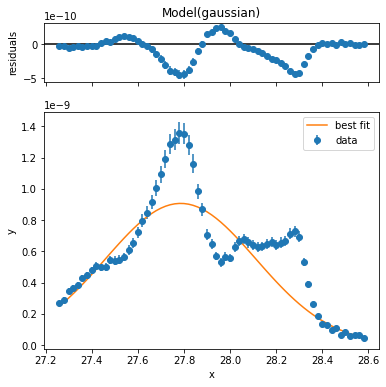

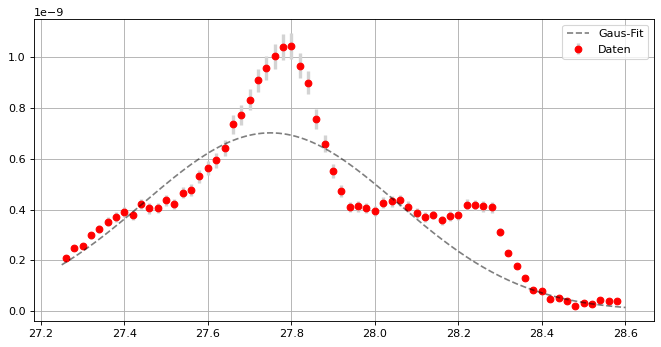

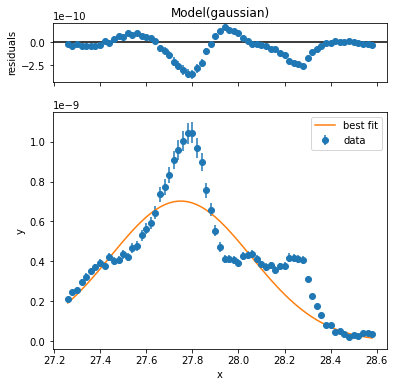

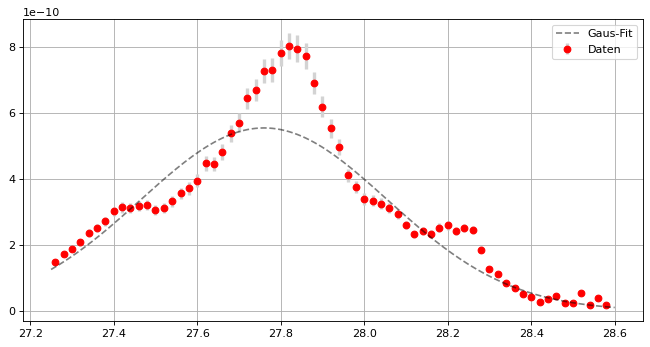

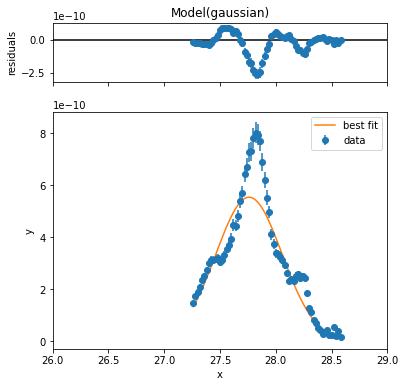

In [17]:
fig = plt.figure(figsize=(20,10),dpi=80,linewidth=50)
for i in os.listdir('Data'):
    path = 'Data/'+i
    with open(path) as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((3,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]
        data[2] = data[1]*0.05
    #plt.plot(data[0],data[1],label=str(i.split(' ')[1]))
    gaus1fit(27.25,28.6,i)
plt.legend()
plt.xlim(26,29)
#plt.show()
